In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("DataCoSupplyChainDataset.csv", encoding='ISO-8859-1')
data.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [4]:
data.shape

(180519, 53)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [6]:
data.isnull().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [7]:
data.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


# Data Preprocessing

In [8]:
# Standardize column names for dataco_supply_chain dataset
data.columns = data.columns.str.upper().str.replace(' ', '_')
data.head()

,TYPE,DAYS_FOR_SHIPPING_(REAL),DAYS_FOR_SHIPMENT_(SCHEDULED),BENEFIT_PER_ORDER,SALES_PER_CUSTOMER,DELIVERY_STATUS,LATE_DELIVERY_RISK,CATEGORY_ID,CATEGORY_NAME,CUSTOMER_CITY,...,ORDER_ZIPCODE,PRODUCT_CARD_ID,PRODUCT_CATEGORY_ID,PRODUCT_DESCRIPTION,PRODUCT_IMAGE,PRODUCT_NAME,PRODUCT_PRICE,PRODUCT_STATUS,SHIPPING_DATE_(DATEORDERS),SHIPPING_MODE
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [9]:
# select columns to use
df = data[['ORDER_DATE_(DATEORDERS)',  'CATEGORY_NAME', 'CATEGORY_ID', 'ORDER_ITEM_QUANTITY', 'ORDER_REGION', 'ORDER_STATUS', 'PRODUCT_NAME', 'PRODUCT_CARD_ID', 'DAYS_FOR_SHIPPING_(REAL)', 'DAYS_FOR_SHIPMENT_(SCHEDULED)']]
df.head()

,ORDER_DATE_(DATEORDERS),CATEGORY_NAME,CATEGORY_ID,ORDER_ITEM_QUANTITY,ORDER_REGION,ORDER_STATUS,PRODUCT_NAME,PRODUCT_CARD_ID,DAYS_FOR_SHIPPING_(REAL),DAYS_FOR_SHIPMENT_(SCHEDULED)
0,1/31/2018 22:56,Sporting Goods,73,1,Southeast Asia,COMPLETE,Smart watch,1360,3,4
1,1/13/2018 12:27,Sporting Goods,73,1,South Asia,PENDING,Smart watch,1360,5,4
2,1/13/2018 12:06,Sporting Goods,73,1,South Asia,CLOSED,Smart watch,1360,4,4
3,1/13/2018 11:45,Sporting Goods,73,1,Oceania,COMPLETE,Smart watch,1360,3,4
4,1/13/2018 11:24,Sporting Goods,73,1,Oceania,PENDING_PAYMENT,Smart watch,1360,2,4


In [10]:
df['ORDER_DATE_(DATEORDERS)'] = pd.to_datetime(df['ORDER_DATE_(DATEORDERS)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 10 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   ORDER_DATE_(DATEORDERS)        180519 non-null  datetime64[ns]
 1   CATEGORY_NAME                  180519 non-null  object        
 2   CATEGORY_ID                    180519 non-null  int64         
 3   ORDER_ITEM_QUANTITY            180519 non-null  int64         
 4   ORDER_REGION                   180519 non-null  object        
 5   ORDER_STATUS                   180519 non-null  object        
 6   PRODUCT_NAME                   180519 non-null  object        
 7   PRODUCT_CARD_ID                180519 non-null  int64         
 8   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64         
 9   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 13.8+ MB


In [11]:
# Extracting year, month, day, and weekday from the order date
df['ORDER_YEAR'] = df['ORDER_DATE_(DATEORDERS)'].dt.year
df['ORDER_MONTH'] = df['ORDER_DATE_(DATEORDERS)'].dt.month
df['ORDER_DAY'] = df['ORDER_DATE_(DATEORDERS)'].dt.day
df['ORDER_WEEKDAY'] = df['ORDER_DATE_(DATEORDERS)'].dt.weekday
df['ORDER_DATE'] = df['ORDER_DATE_(DATEORDERS)'].dt.date
df.drop(columns='ORDER_DATE_(DATEORDERS)', inplace=True)
df.head()

,CATEGORY_NAME,CATEGORY_ID,ORDER_ITEM_QUANTITY,ORDER_REGION,ORDER_STATUS,PRODUCT_NAME,PRODUCT_CARD_ID,DAYS_FOR_SHIPPING_(REAL),DAYS_FOR_SHIPMENT_(SCHEDULED),ORDER_YEAR,ORDER_MONTH,ORDER_DAY,ORDER_WEEKDAY,ORDER_DATE
0,Sporting Goods,73,1,Southeast Asia,COMPLETE,Smart watch,1360,3,4,2018,1,31,2,2018-01-31
1,Sporting Goods,73,1,South Asia,PENDING,Smart watch,1360,5,4,2018,1,13,5,2018-01-13
2,Sporting Goods,73,1,South Asia,CLOSED,Smart watch,1360,4,4,2018,1,13,5,2018-01-13
3,Sporting Goods,73,1,Oceania,COMPLETE,Smart watch,1360,3,4,2018,1,13,5,2018-01-13
4,Sporting Goods,73,1,Oceania,PENDING_PAYMENT,Smart watch,1360,2,4,2018,1,13,5,2018-01-13


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   CATEGORY_NAME                  180519 non-null  object
 1   CATEGORY_ID                    180519 non-null  int64 
 2   ORDER_ITEM_QUANTITY            180519 non-null  int64 
 3   ORDER_REGION                   180519 non-null  object
 4   ORDER_STATUS                   180519 non-null  object
 5   PRODUCT_NAME                   180519 non-null  object
 6   PRODUCT_CARD_ID                180519 non-null  int64 
 7   DAYS_FOR_SHIPPING_(REAL)       180519 non-null  int64 
 8   DAYS_FOR_SHIPMENT_(SCHEDULED)  180519 non-null  int64 
 9   ORDER_YEAR                     180519 non-null  int64 
 10  ORDER_MONTH                    180519 non-null  int64 
 11  ORDER_DAY                      180519 non-null  int64 
 12  ORDER_WEEKDAY                  180519 non-nu

# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Order Item Quantity')

<Figure size 1000x600 with 0 Axes>

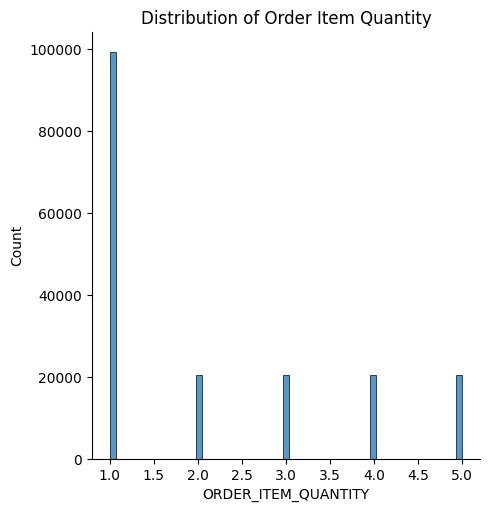

In [34]:
# Distribution of ORDER_ITEM_QUANTITY
plt.figure(figsize=(10, 6))
sns.displot(df['ORDER_ITEM_QUANTITY'])
plt.title('Distribution of Order Item Quantity')

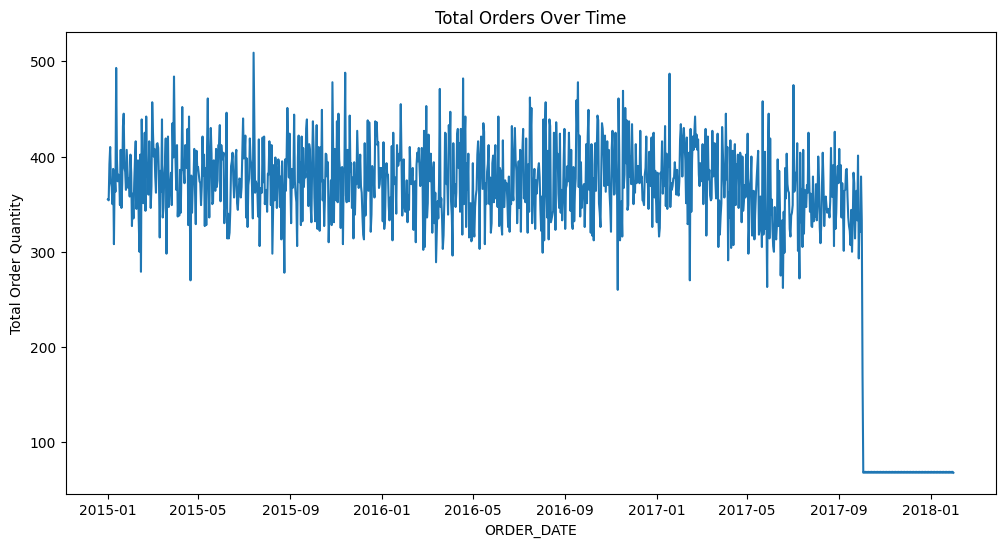

In [35]:
# Orders over time
plt.figure(figsize=(12, 6))
df.groupby('ORDER_DATE')['ORDER_ITEM_QUANTITY'].sum().plot()
plt.title('Total Orders Over Time')
plt.ylabel('Total Order Quantity')
plt.show()

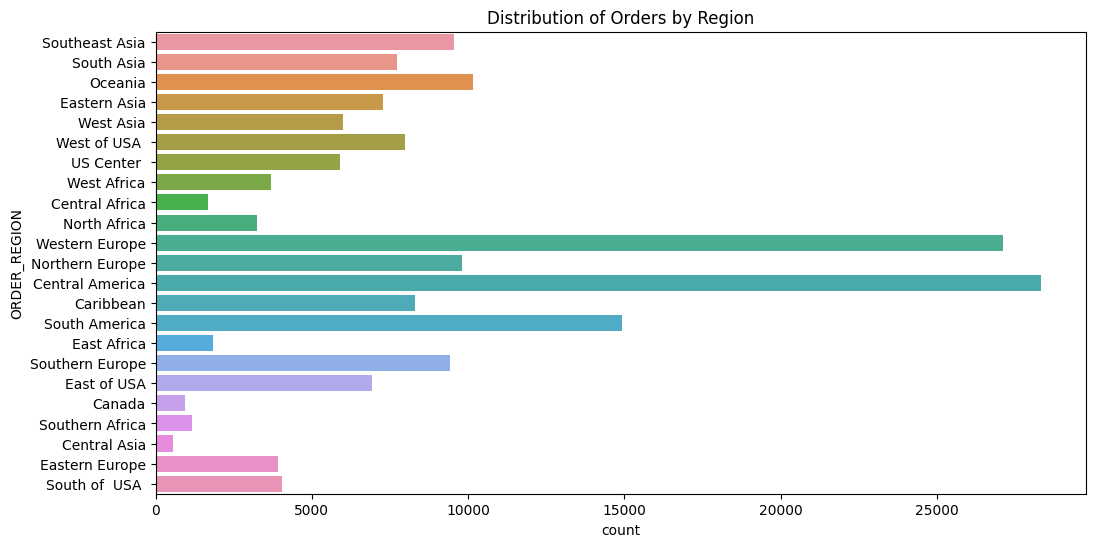

In [36]:
# Distribution of orders by region
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='ORDER_REGION')
plt.title('Distribution of Orders by Region')
plt.show()

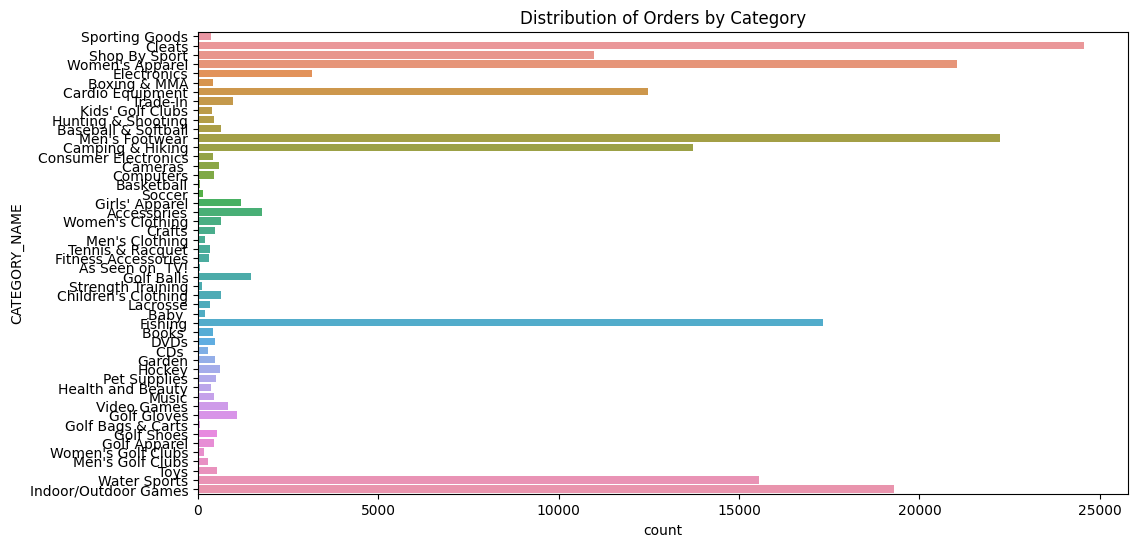

In [37]:
# Distribution of orders by category
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='CATEGORY_NAME')
plt.title('Distribution of Orders by Category')
plt.show()

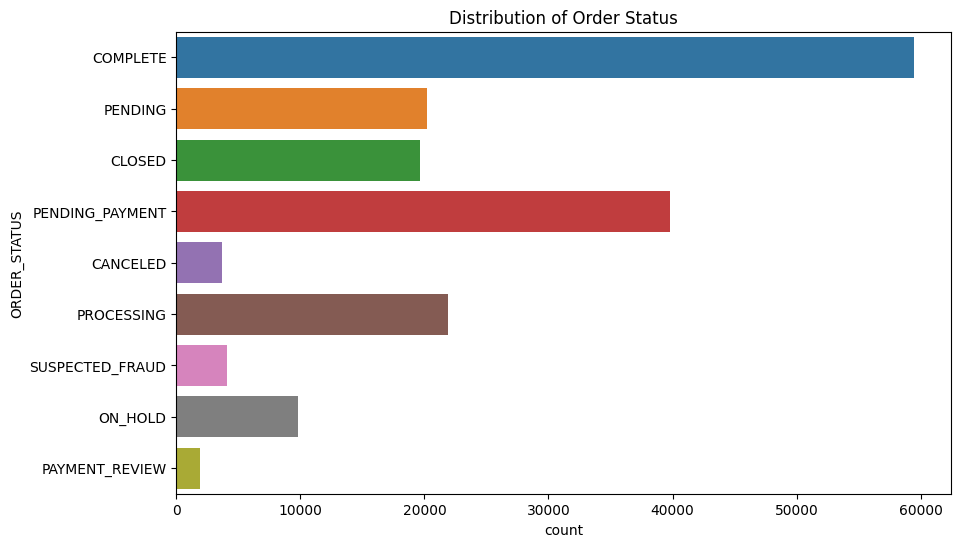

In [38]:
# Distribution of order status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='ORDER_STATUS')
plt.title('Distribution of Order Status')
plt.show()

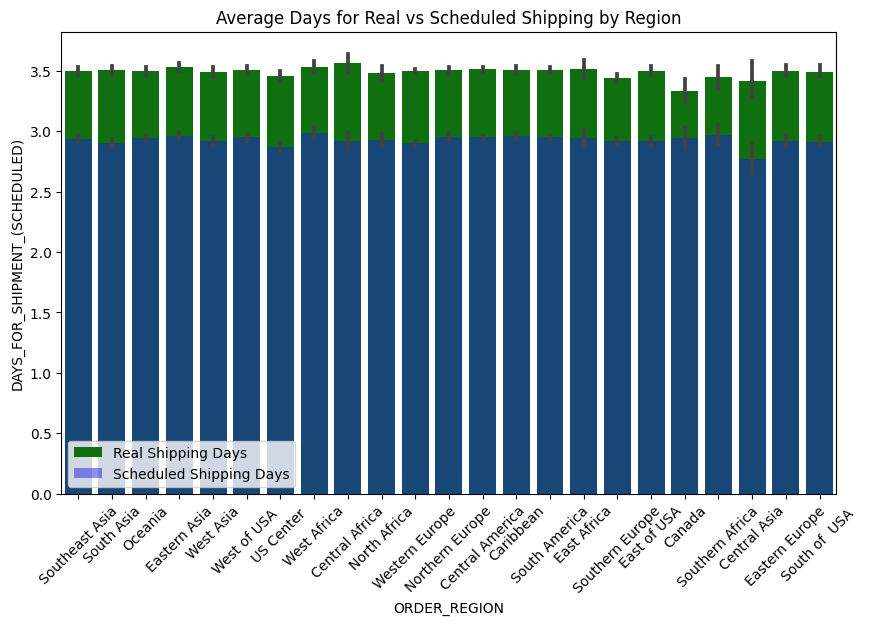

In [46]:
# Average days for real shipping vs scheduled shipping
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='ORDER_REGION', y='DAYS_FOR_SHIPPING_(REAL)', color='green', label='Real Shipping Days')
sns.barplot(data=df, x='ORDER_REGION', y='DAYS_FOR_SHIPMENT_(SCHEDULED)', color='blue', alpha=0.5, label='Scheduled Shipping Days')
plt.title('Average Days for Real vs Scheduled Shipping by Region')
plt.legend()
plt.xticks(rotation=45)
plt.show()

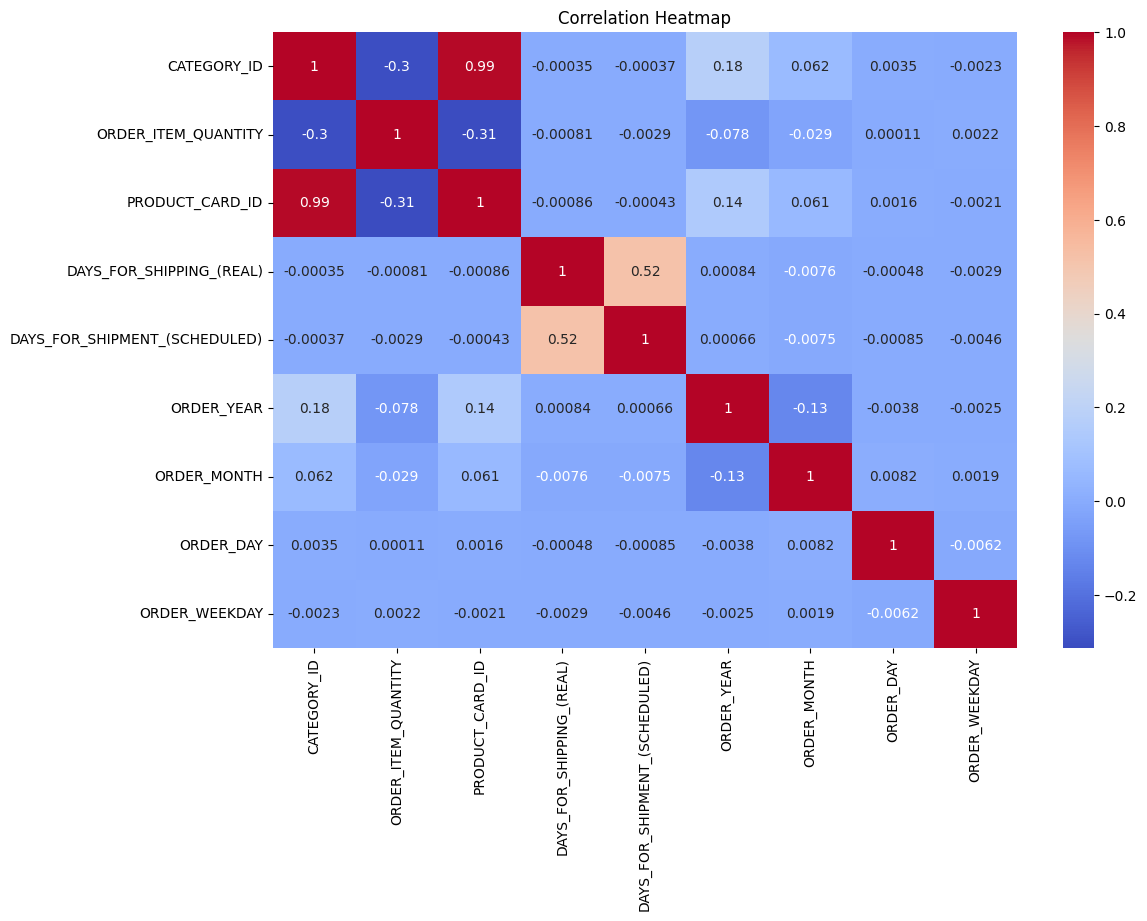

In [43]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

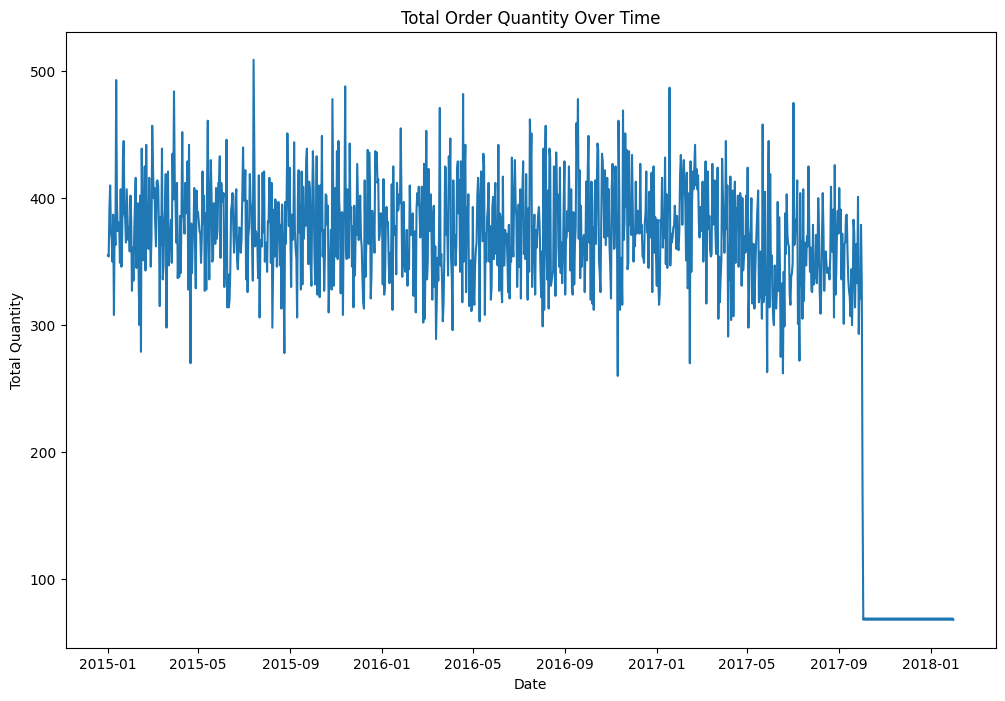

In [47]:
# Orders over time
plt.figure(figsize=(12, 8))
daily_orders = df.groupby(['ORDER_DATE'])['ORDER_ITEM_QUANTITY'].sum().reset_index()
sns.lineplot(data=daily_orders, x='ORDER_DATE', y='ORDER_ITEM_QUANTITY')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

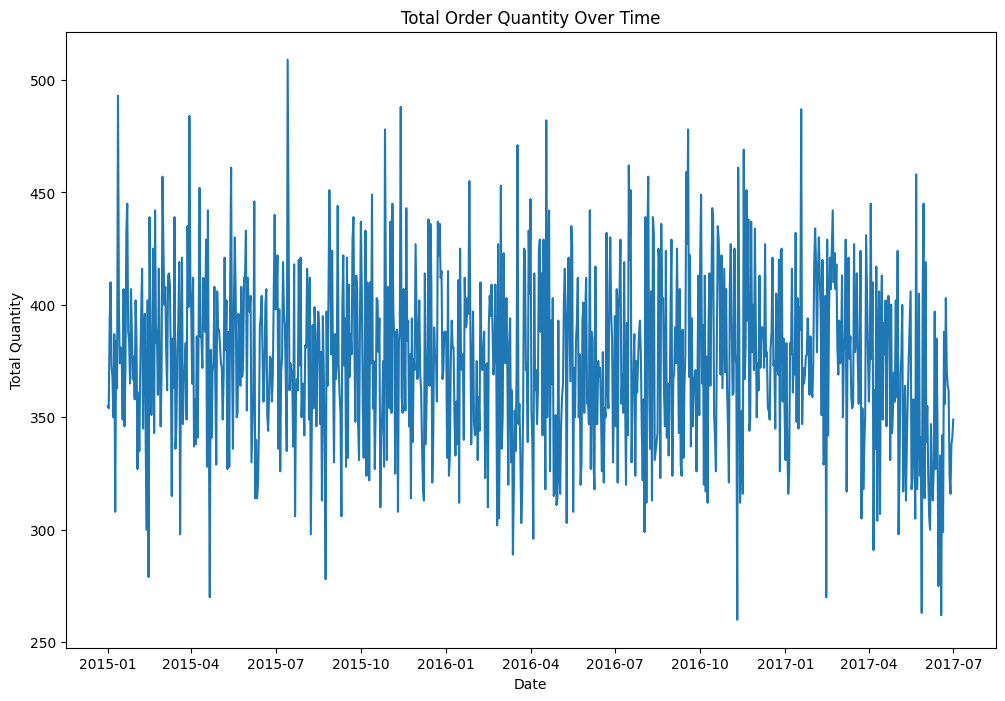

In [50]:
# Orders over time - filter out last dates
plt.figure(figsize=(12, 8))
filtered_daily_orders = daily_orders[(daily_orders['ORDER_DATE'] <= pd.to_datetime('2017-07-01'))]
sns.lineplot(data=filtered_daily_orders, x='ORDER_DATE', y='ORDER_ITEM_QUANTITY')
plt.title('Total Order Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.show()

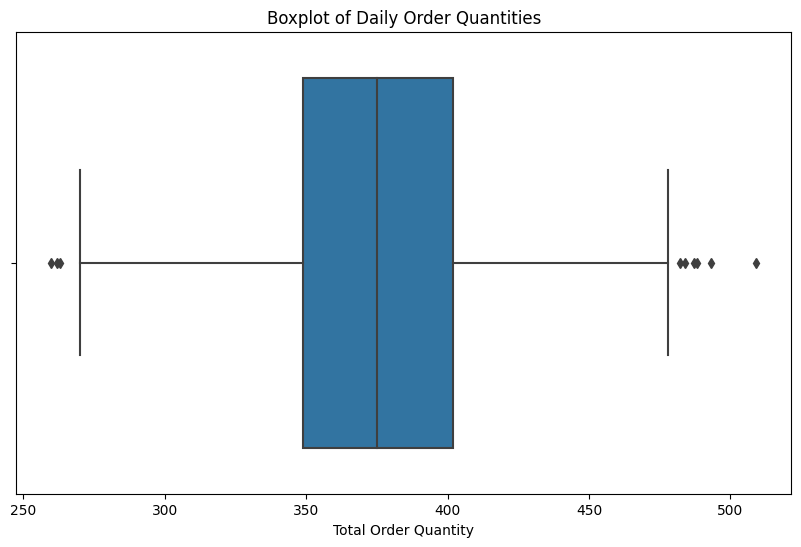

In [51]:
# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

In [52]:
# remove outliers
# Aggregate order quantities by date

# Calculate Q1, Q3, and IQR
Q1 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.25)
Q3 = filtered_daily_orders['ORDER_ITEM_QUANTITY'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_daily_orders = filtered_daily_orders[(filtered_daily_orders['ORDER_ITEM_QUANTITY'] >= lower_bound) & 
                               (filtered_daily_orders['ORDER_ITEM_QUANTITY'] <= upper_bound)]

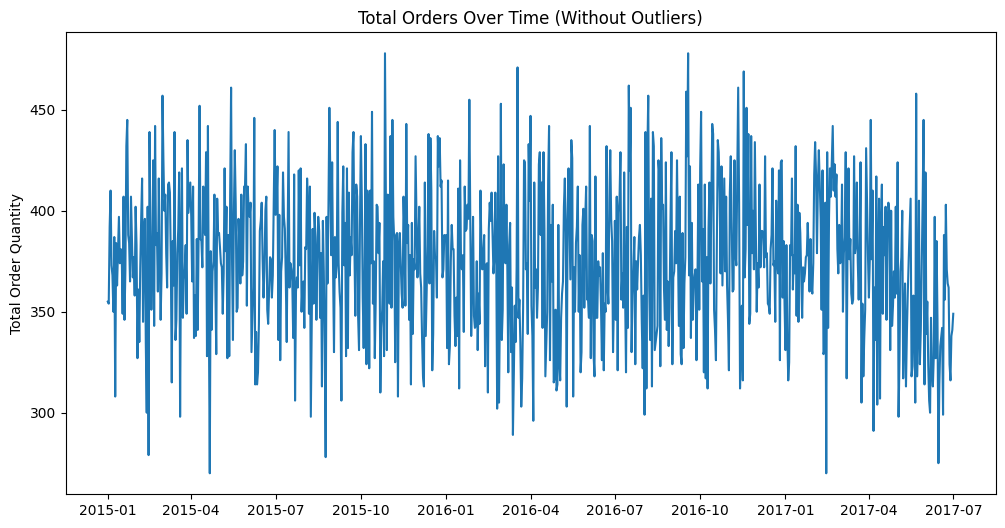

In [53]:
# Plotting the time series without outliers
plt.figure(figsize=(12, 6))
plt.plot(cleaned_daily_orders['ORDER_DATE'], cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Total Orders Over Time (Without Outliers)')
plt.ylabel('Total Order Quantity')
plt.show()

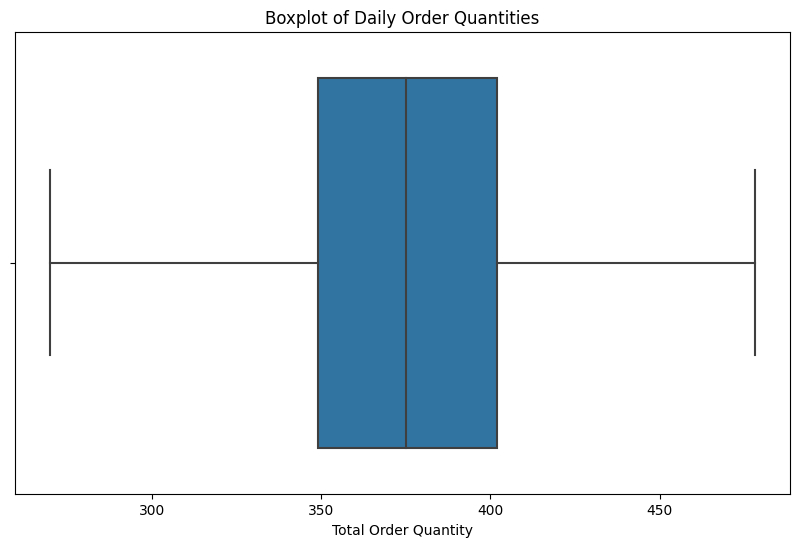

In [54]:
# Boxplot for daily order quantities
plt.figure(figsize=(10, 6))
sns.boxplot(x=cleaned_daily_orders['ORDER_ITEM_QUANTITY'])
plt.title('Boxplot of Daily Order Quantities')
plt.xlabel('Total Order Quantity')
plt.show()

In [55]:
# create monthly, weekly data
cleaned_daily_orders = cleaned_daily_orders.copy()
cleaned_daily_orders['ORDER_DATE'] = pd.to_datetime(cleaned_daily_orders['ORDER_DATE'])
cleaned_daily_orders['YEAR_MONTH']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('M')
cleaned_daily_orders['YEAR_WEEK']=cleaned_daily_orders['ORDER_DATE'].dt.to_period('W')
cleaned_daily_orders

,ORDER_DATE,ORDER_ITEM_QUANTITY,YEAR_MONTH,YEAR_WEEK
0,2015-01-01,355,2015-01,2014-12-29/2015-01-04
1,2015-01-02,354,2015-01,2014-12-29/2015-01-04
2,2015-01-03,392,2015-01,2014-12-29/2015-01-04
3,2015-01-04,410,2015-01,2014-12-29/2015-01-04
4,2015-01-05,373,2015-01,2015-01-05/2015-01-11
...,...,...,...,...
908,2017-06-27,324,2017-06,2017-06-26/2017-07-02
909,2017-06-28,316,2017-06,2017-06-26/2017-07-02
910,2017-06-29,338,2017-06,2017-06-26/2017-07-02
911,2017-06-30,341,2017-06,2017-06-26/2017-07-02


In [56]:
cleaned_daily_orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 904 entries, 0 to 912
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ORDER_DATE           904 non-null    datetime64[ns]
 1   ORDER_ITEM_QUANTITY  904 non-null    int64         
 2   YEAR_MONTH           904 non-null    period[M]     
 3   YEAR_WEEK            904 non-null    period[W-SUN] 
dtypes: datetime64[ns](1), int64(1), period[M](1), period[W-SUN](1)
memory usage: 35.3 KB


In [57]:
# Group by 'year-month' and sum the ORDER_ITEM_QUANTITY
monthly_orders = cleaned_daily_orders.groupby('YEAR_MONTH')['ORDER_ITEM_QUANTITY'].sum()
weekly_orders = cleaned_daily_orders.groupby('YEAR_WEEK')['ORDER_ITEM_QUANTITY'].sum()

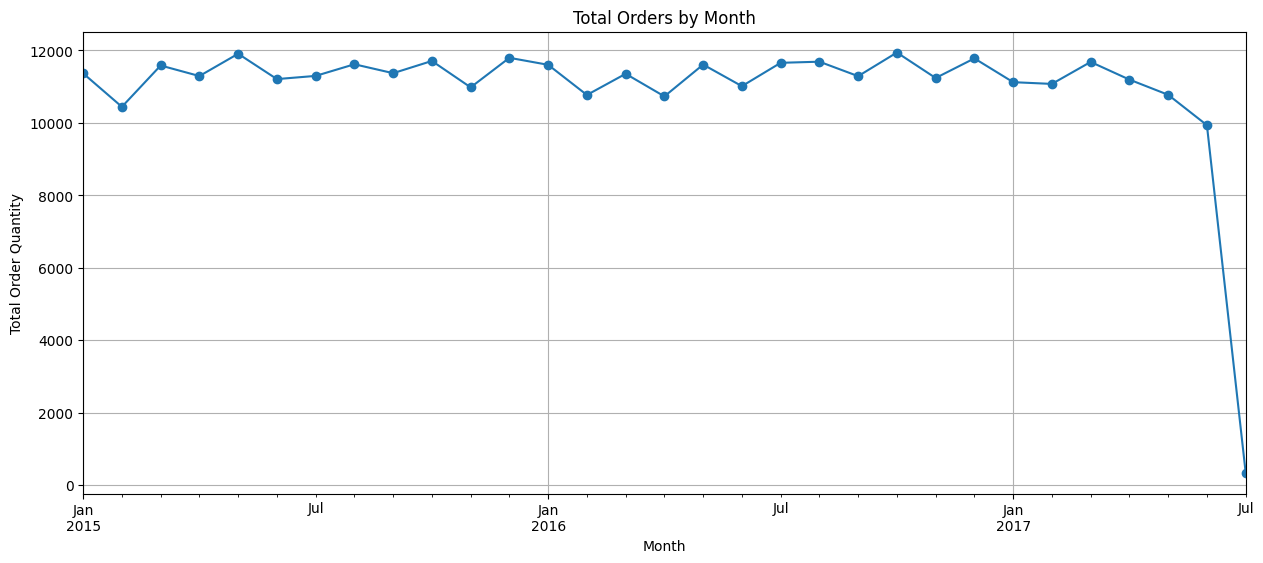

In [59]:
plt.figure(figsize=(15, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Month')
plt.ylabel('Total Order Quantity')
plt.xlabel('Month')
plt.grid(True)
plt.show()

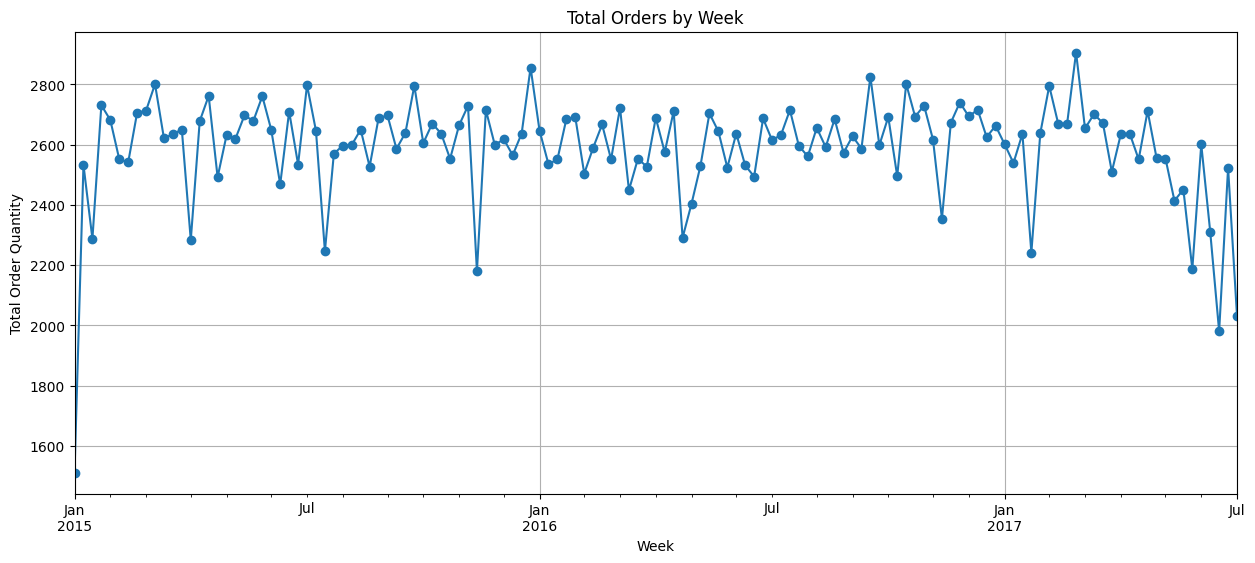

In [60]:
plt.figure(figsize=(15, 6))
weekly_orders.plot(kind='line', marker='o')
plt.title('Total Orders by Week')
plt.ylabel('Total Order Quantity')
plt.xlabel('Week')
plt.grid(True)
plt.show()

In [63]:
# Convert the series to a DataFrame
weekly_orders_df = weekly_orders.reset_index()
weekly_orders_df.columns = ['ds', 'y']

# Convert the 'ds' column to datetime format
weekly_orders_df['ds'] = weekly_orders_df['ds'].dt.to_timestamp()

# Split the data (holding out the last 20% for testing)
split_point = int(len(weekly_orders_df) * 0.80)
train = weekly_orders_df.iloc[:split_point]
test = weekly_orders_df.iloc[split_point:]

# Initialize and fit the Prophet model
weekly_model = Prophet()
weekly_model.fit(train)

17:29:48 - cmdstanpy - INFO - Chain [1] start processing
17:29:54 - cmdstanpy - INFO - Chain [1] done processing


In [64]:
# Create future dates for prediction (entire duration: train + test)
weekly_future = weekly_model.make_future_dataframe(periods=len(test), freq='W-SUN')

# Prediction
weekly_forecast = weekly_model.predict(weekly_future)

In [65]:
# Evaluate on Training data
y_pred_train = weekly_forecast['yhat'][:split_point]
mae_train = mean_absolute_error(train['y'], y_pred_train)
mse_train = mean_squared_error(train['y'], y_pred_train)
rmse_train = np.sqrt(mse_train)

print(f"Training MAE: {mae_train}")
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")

Training MAE: 100.04532317121378
Training MSE: 24069.189780521832
Training RMSE: 155.1424821914418


In [66]:
# Evaluate on Testing data
y_pred_test = weekly_forecast['yhat'][split_point:]
mae_test = mean_absolute_error(test['y'], y_pred_test)
mse_test = mean_squared_error(test['y'], y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f"\nTesting MAE: {mae_test}")
print(f"Testing MSE: {mse_test}")
print(f"Testing RMSE: {rmse_test}")


Testing MAE: 162.48564520168532
Testing MSE: 60712.76335777611
Testing RMSE: 246.3996009691901


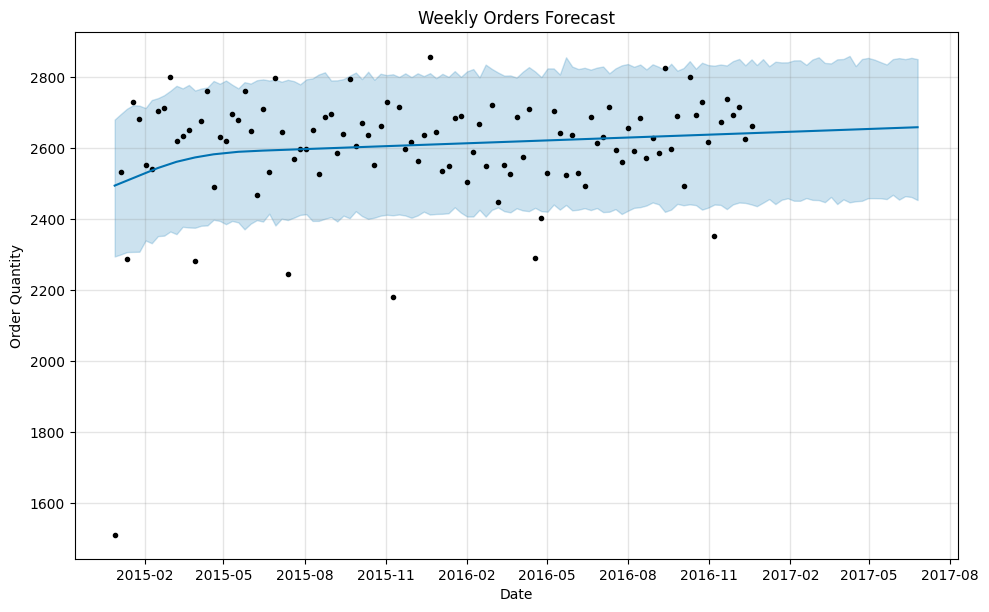

In [69]:
# Plot the forecast
weekly_fig1 = weekly_model.plot(weekly_forecast)
plt.title('Weekly Orders Forecast')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.show()

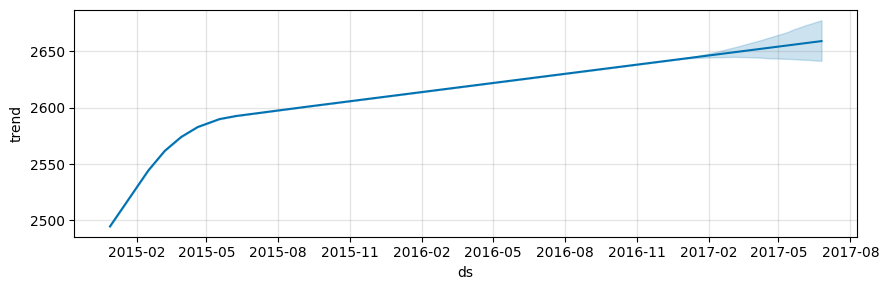

In [70]:
# If you want to see the components of the forecast (trend, yearly seasonality, etc.)
weekly_fig2 = weekly_model.plot_components(weekly_forecast)

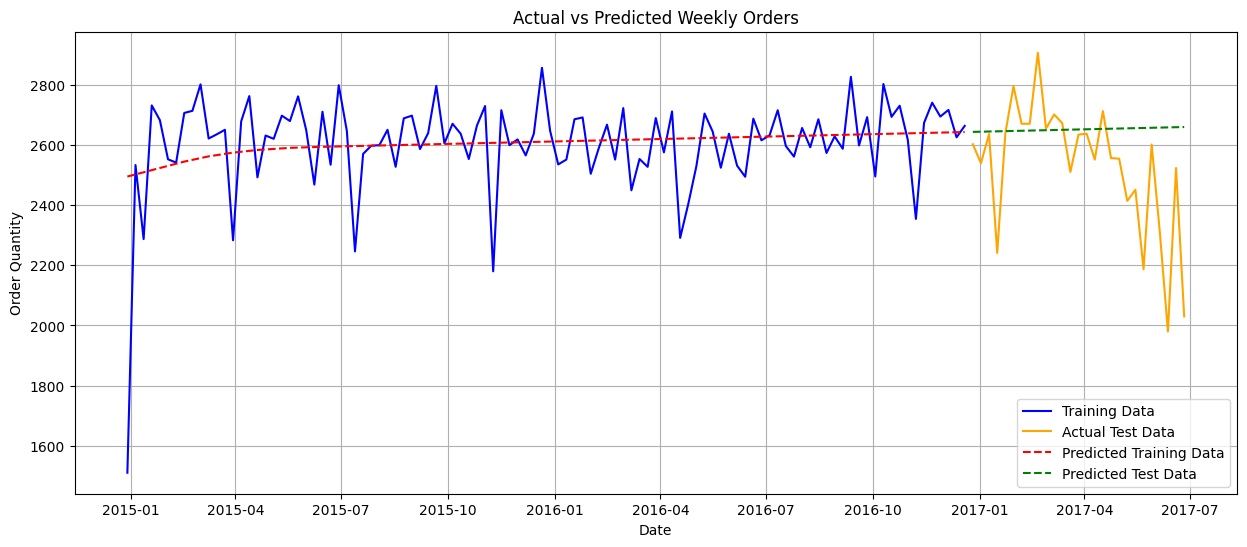

In [71]:
# Plotting actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(train['ds'], train['y'], label='Training Data', color='blue')
plt.plot(test['ds'], test['y'], label='Actual Test Data', color='orange')
plt.plot(train['ds'], y_pred_train, label='Predicted Training Data', color='red', linestyle='--')
plt.plot(test['ds'], y_pred_test, label='Predicted Test Data', color='green', linestyle='--')
plt.title('Actual vs Predicted Weekly Orders')
plt.xlabel('Date')
plt.ylabel('Order Quantity')
plt.legend()
plt.grid(True)

In [72]:
# Safety Stock and Reorder Point

# Merge 'y' values from train and test into weekly_forecast
weekly_forecast = weekly_forecast.merge(train[['ds', 'y']], on='ds', how='left')
weekly_forecast = weekly_forecast.merge(test[['ds', 'y']], on='ds', how='left', suffixes=('', '_test'))
weekly_forecast['y'].fillna(weekly_forecast['y_test'], inplace=True)
weekly_forecast.drop(columns='y_test', inplace=True)

# Calculate weekly standard deviation of actual demand
weekly_forecast['std_dev'] = weekly_forecast['y'].rolling(window=7).std()

# Calculate weekly safety stock
weekly_forecast['safety_stock'] = 1.65 * weekly_forecast['std_dev'] * np.sqrt(1)

# Calculate weekly average demand from actual data
weekly_forecast['avg_weekly_demand'] = weekly_forecast['y'].rolling(window=7).mean()

# Calculate weekly reorder point
weekly_forecast['reorder_point'] = (weekly_forecast['avg_weekly_demand'] * 1) + weekly_forecast['safety_stock']

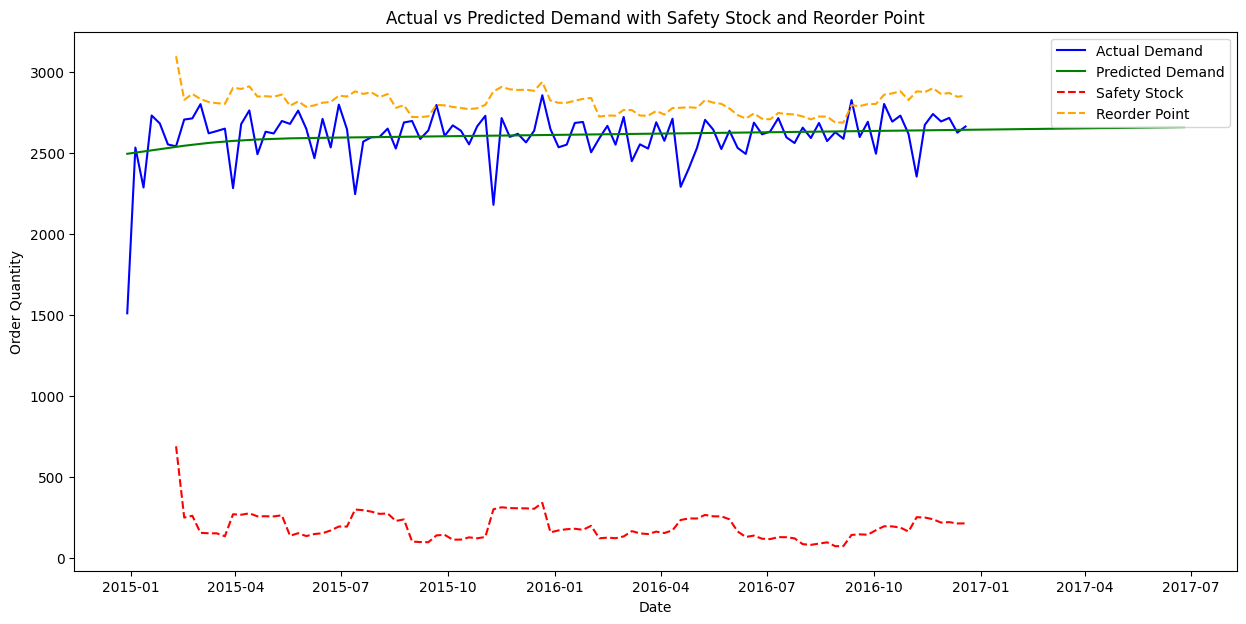

In [73]:
# Plotting Stock and Reorder Point
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point', color='orange', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')

In [74]:
# With Forecasted Safety Stock and Reorder Point

# Calculate weekly standard deviation of forecasted demand
weekly_forecast['forecasted_std_dev'] = weekly_forecast['yhat'].rolling(window=7).std()

# Calculate weekly safety stock for forecasted demand
weekly_forecast['forecasted_safety_stock'] = 1.65 * weekly_forecast['forecasted_std_dev'] * np.sqrt(1)

# Calculate weekly average demand from forecasted data
weekly_forecast['forecasted_avg_weekly_demand'] = weekly_forecast['yhat'].rolling(window=7).mean()

# Calculate weekly reorder point for forecasted demand
weekly_forecast['forecasted_reorder_point'] = (weekly_forecast['forecasted_avg_weekly_demand'] * 1) + weekly_forecast['forecasted_safety_stock']

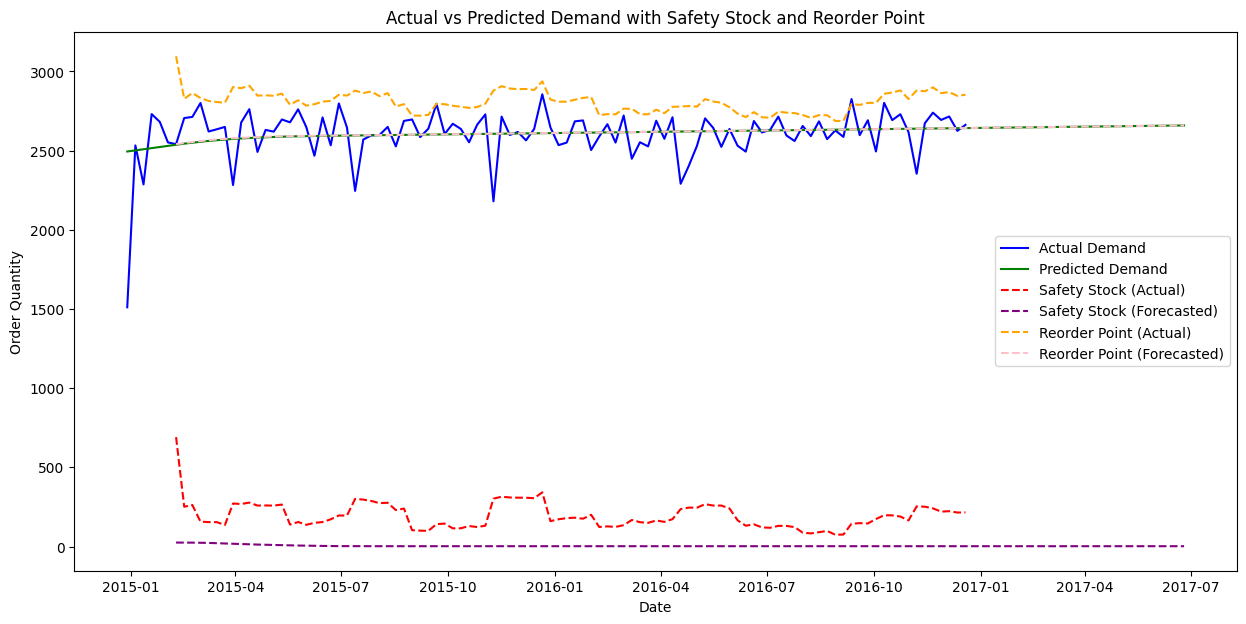

In [75]:
# Plotting Forecasted Safety Stock and Reorder Point
plt.figure(figsize=(15, 7))
plt.plot(weekly_forecast['ds'], weekly_forecast['y'], label='Actual Demand', color='blue')
plt.plot(weekly_forecast['ds'], weekly_forecast['yhat'], label='Predicted Demand', color='green')
plt.plot(weekly_forecast['ds'], weekly_forecast['safety_stock'], label='Safety Stock (Actual)', color='red', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_safety_stock'], label='Safety Stock (Forecasted)', color='purple', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['reorder_point'], label='Reorder Point (Actual)', color='orange', linestyle='--')
plt.plot(weekly_forecast['ds'], weekly_forecast['forecasted_reorder_point'], label='Reorder Point (Forecasted)', color='pink', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Demand with Safety Stock and Reorder Point')
plt.xlabel('Date')
plt.ylabel('Order Quantity')